In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24


from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [11]:
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
#get_ipython().run_line_magic('load_ext', 'autoreload')
#get_ipython().run_line_magic('autoreload', '2')

import matplotlib.pyplot as plt
#try:
#    import matplotlib.pyplot as plt
#except ImportError:
#    import sys
#    get_ipython().system('{sys.executable} -m pip install matplotlib')
#    import matplotlib.pyplot as plt

import sys    
import numpy as np

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

from neurolib.models.wc import WCModel
from neurolib.utils.loadData import filterSubcortical
from scipy.io import loadmat
from neurolib.utils.loadData import Dataset
import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.devutils as du

# a nice color map
plt.rcParams['image.cmap'] = 'magma'

def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat


#data_path = "/mnt/raid/data/MScTheses/msc_pamir/SCZ-FC-modelling"

data_path = "/Users/pamirozsuna/Desktop/msc_pamir/SCZ-FC-modelling"


C_data = np.load(data_path+"/AvgCmatrixHC.npy")
D_data = np.load(data_path+"/AvgDmatrixHC.npy")

Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

FC_data = np.load(data_path+"/AvgFmatrixHC.npy")
timeseries = np.load(data_path+"/AvgTmatrixHC.npy")

FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

C_data_scz = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data_scz = np.load(data_path+"/AvgDmatrixSCZ.npy")

Cmat_tmp_scz = averageMat(C_data_scz)
Dmat_tmp_scz = averageMat(D_data_scz)

Cmat_scz = filterSubcortical(Cmat_tmp_scz)
Dmat_scz = filterSubcortical(Dmat_tmp_scz)

FC_data_scz = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries_scz = np.load(data_path+"/AvgTmatrixSCZ.npy")

FC_tmp_scz = averageMat(FC_data_scz)
FCs_scz = filterSubcortical(FC_tmp_scz)

#frontal_indices = 1-2,  3-12, 15-32, 35 - 36, 37 - 38, 39 - 40,  73 - 74
frontal_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                  29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 67, 68]
#occipital_indices = 13 - 14, 47 - 60
occipital_indices =  [13, 14, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
#parietal_indices =  61 - 62, 63 - 72
parietal_indices = [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
#temporal_indices = 33 - 34, 83 - 86, 87 - 88, 89 - 90, 91 - 92, 93 - 94
temporal_indices = [33, 34, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]

In [2]:
hc = [[0.6197587782611094,
  0.5934816857784985,
  0.5702122908660319,
  0.447679300815288,
  0.5849755887252841,
  0.7002420865993657,
  0.576221360126764,
  0.43749087532006653,
  0.7211338006998617,
  0.6649087998494587,
  0.7482825017566463,
  0.6171788190103242,
  0.5357639624815755,
  0.6081491745981723,
  0.396761821427944,
  0.4466200146052721,
  0.4283846453280838,
  0.622936079520662,
  0.5902006328532527,
  0.5161995104566993,
  0.4373002718077275,
  0.4952116579231954,
  0.6585336610522396,
  0.4198337671756288,
  0.4596261434616214,
  0.6330904112150236,
  0.6278349012390679,
  0.6312479000747069,
  0.47139346754186284,
  0.5531299937517902,
  0.667917218152795,
  0.6477522720940183,
  0.6303475729555208,
  0.6366785850011064,
  0.48313728555847674,
  0.754701360365878,
  0.660043128232497,
  0.7593436085027285,
  0.6390233246651732,
  0.44010027174507543,
  0.6614406587653433,
  0.5440339267148943,
  0.6219718079063017,
  0.4042845837633358,
  0.4355321660250578,
  0.7225690729196123,
  0.6966927535319081,
  0.35259038068331966,
  0.5782093921995834,
  0.5470389945541738,
  0.5200676348370353,
  0.6880565811995268,
  0.41579774798968683,
  0.5616118238128694,
  0.5710498234166144,
  0.7460419615035778,
  0.5102711645792388,
  0.46992935175802214,
  0.5301728533287283,
  0.6309541918571548,
  0.7469289801771996,
  0.44123105526078055,
  0.6536557746399457,
  0.4682498139671485,
  0.5611860352017366,
  0.4943755114779812,
  0.5256790008967969,
  0.6637499042620889,
  0.634099377318316,
  0.6131470870001254,
  0.706395836525181,
  0.4983597929741329,
  0.5313911524818669,
  0.7065539823600457,
  0.4740452836977096,
  0.5870498795343262,
  0.5945877680224656,
  0.45711796978591124,
  0.6370791097075515,
  0.6336997084550778,
  0.5585882510820903,
  0.5910081179490013,
  0.6266694922104352,
  0.4359083039574979,
  0.633000859950286,
  0.6682388620961973,
  0.7740315827147731,
  0.5617577100987355,
  0.6745415120411445,
  0.5636056014477309,
  0.713249494572546,
  0.7528032078576554,
  0.5982326855496437,
  0.5486841393467838,
  0.47931258496721013,
  0.6449591899652063,
  0.5742205956660584,
  0.44938690145824894,
  0.5547122022821991,
  0.6020231958021965],
 [0.5966136456612674,
  0.565374463574022,
  0.5563827857369367,
  0.42064542173495745,
  0.5534161911812825,
  0.6941790428161306,
  0.5594878424210836,
  0.4199630846508709,
  0.7187677035802646,
  0.6545993581237626,
  0.7190611731664582,
  0.6353428096523369,
  0.5121912650115076,
  0.618110807891606,
  0.391911751276938,
  0.45880335093668406,
  0.43508486384556266,
  0.6440400039159284,
  0.5819951054879978,
  0.5260975435689293,
  0.39360315796141626,
  0.4895914318961888,
  0.6456875887306049,
  0.371152137046206,
  0.4419271255933667,
  0.6244876128564573,
  0.6292401181121108,
  0.6098211902149436,
  0.4596450566871857,
  0.5218478894228573,
  0.6702198117743796,
  0.6357592170279608,
  0.6109191925860321,
  0.6670232956689531,
  0.4639055619096688,
  0.739282016608751,
  0.63628938982729,
  0.7656620793159905,
  0.6446231006510039,
  0.4140303785115211,
  0.6410828298585097,
  0.5249214711583887,
  0.6044950597582198,
  0.35580015703520745,
  0.40101018969475816,
  0.7077876649383987,
  0.7204515300981891,
  0.32376030843282444,
  0.5438993940737209,
  0.5185725446981558,
  0.4694713054402216,
  0.6616309124424675,
  0.41532642324187213,
  0.5548389396840161,
  0.5423614910073788,
  0.7734758372008221,
  0.47789565828777486,
  0.4783698551127269,
  0.5359669140931058,
  0.6187052270719265,
  0.7473315344489034,
  0.3931125060999189,
  0.6315582682440463,
  0.4799882197563883,
  0.5543773982637767,
  0.45863463226659124,
  0.4882347143574513,
  0.6441981086674116,
  0.623070626741159,
  0.5732866179275043,
  0.7158367759708835,
  0.4816413506558402,
  0.5339506413297826,
  0.6815689532780579,
  0.4782041564804376,
  0.5716356702938726,
  0.5951689889866753,
  0.4497031723045212,
  0.5997808346892677,
  0.6203498815603484,
  0.5394677134661882,
  0.5785606623179194,
  0.6062187516904511,
  0.3997379038749599,
  0.6284274605619383,
  0.656054824333817,
  0.7579379281908195,
  0.5201237419063748,
  0.6663923646761659,
  0.5715145946980369,
  0.7173606240755502,
  0.7412730886012331,
  0.5810872484308642,
  0.5212849777138248,
  0.4362950973528013,
  0.6483196006718602,
  0.5724069750325238,
  0.42944322179534333,
  0.5290756897519997,
  0.5857077655378575],
 [0.5862540863622866,
  0.5823549985954953,
  0.49041671309331364,
  0.387971136623326,
  0.5088814999808359,
  0.6241116585629547,
  0.4498793062132904,
  0.3540570087949673,
  0.6349537544009705,
  0.6340531908453989,
  0.7254505969912911,
  0.4683369199463314,
  0.48082953354878555,
  0.4898329345427519,
  0.33142012045462726,
  0.32475386577989346,
  0.3901164912225286,
  0.49506316712947784,
  0.5241059331106844,
  0.4454345669701264,
  0.41054695723137036,
  0.35128409571660696,
  0.576487163788526,
  0.3875165338398361,
  0.371373412985216,
  0.5200396687600684,
  0.5259340944274048,
  0.5923013652717553,
  0.3681050722817528,
  0.5082465139547543,
  0.6211294782141926,
  0.615692192127769,
  0.545409159657527,
  0.4629837269750987,
  0.44384171272461176,
  0.7126480172092441,
  0.6433626146406841,
  0.6937465221985075,
  0.544974590560991,
  0.3157120812952052,
  0.6076625870073693,
  0.4537567388975607,
  0.5578457681976476,
  0.3411588911137303,
  0.3640833254011495,
  0.6474891007378594,
  0.6446840956830251,
  0.2709409765859709,
  0.5991239945483613,
  0.4591657703910432,
  0.5032673366764422,
  0.6575816654590377,
  0.32952424371414285,
  0.42206656052104224,
  0.5363419337259145,
  0.610564534681391,
  0.4261540877136843,
  0.4429435084644622,
  0.42929102941265984,
  0.4843804876728286,
  0.6772203421827805,
  0.42100945543249213,
  0.5717428827053563,
  0.35408167604098345,
  0.49016690241904265,
  0.43065908990128077,
  0.4772803470181003,
  0.5895818229591661,
  0.578915863534045,
  0.5621720276493541,
  0.5973577514461708,
  0.4041249093263722,
  0.48952385432397055,
  0.6533590591404059,
  0.3725548389707634,
  0.5560648045744004,
  0.5198119081901454,
  0.40338402613201274,
  0.5676441866013237,
  0.5605972871642574,
  0.43045211648704684,
  0.508084288132418,
  0.5787950643480289,
  0.381312499800633,
  0.5629149626234009,
  0.5749421965205762,
  0.7438227903572519,
  0.5110023188724808,
  0.6234304813378596,
  0.4486339856784916,
  0.6598236533882568,
  0.6852297974405372,
  0.5188631078528494,
  0.475379576707415,
  0.3736771605985642,
  0.5471406389849067,
  0.41257165927036143,
  0.37225704393542164,
  0.4851845998963447,
  0.5657517631568811],
 [0.6597836440533783,
  0.6557476797270791,
  0.6311013128704609,
  0.5158815086634612,
  0.6671717010718103,
  0.7391213485876326,
  0.6508799106975168,
  0.49588248118119527,
  0.7701842286419421,
  0.6985665146096072,
  0.804852537630719,
  0.6714357608909036,
  0.5857373976649096,
  0.6671866784305251,
  0.4353685996353672,
  0.5057294801360799,
  0.45655239416191673,
  0.6907423951478654,
  0.6552330948528272,
  0.5668499318469407,
  0.5206085361682479,
  0.568678250669474,
  0.7082149913343738,
  0.5054379032834146,
  0.5345585441102609,
  0.6957071353191034,
  0.6828851999560575,
  0.6908241552913021,
  0.5487997425259629,
  0.6119071131946432,
  0.6942470971231043,
  0.7053569622331018,
  0.6998445745049178,
  0.701965760974423,
  0.5305424399491219,
  0.7977026838752452,
  0.6870245595418625,
  0.7831297845812613,
  0.695117688140007,
  0.5480789083564896,
  0.716984302967453,
  0.6231462909932859,
  0.677433542400794,
  0.5151993084361656,
  0.5329686659333499,
  0.7688983698904555,
  0.7189167194253256,
  0.44383285245716425,
  0.6330733858340543,
  0.6305887401769402,
  0.5906417367875905,
  0.7274676179234837,
  0.47750929183896285,
  0.6379718272418257,
  0.6346314627343432,
  0.7769059321386549,
  0.5935446190351235,
  0.462733669791095,
  0.5874944018701067,
  0.7117768208969583,
  0.7810027859101247,
  0.5291313880005422,
  0.7270564432349276,
  0.5256125048448991,
  0.6148405724128972,
  0.5757947631744591,
  0.5994831877058872,
  0.7110690314946018,
  0.6676501332681826,
  0.6843788531082458,
  0.7400114437363194,
  0.598826367885501,
  0.5869393262414658,
  0.7589303106427401,
  0.5205914946537838,
  0.6568302769637671,
  0.623090978712467,
  0.5086985231574256,
  0.7245569819433235,
  0.6765051677994508,
  0.6381202560212007,
  0.6556454591220728,
  0.6823788797765805,
  0.5193578323758972,
  0.6659544814357986,
  0.7169347878708734,
  0.808385764437466,
  0.652160932010381,
  0.707801937375259,
  0.6293645028390839,
  0.748070792242294,
  0.7954379147572466,
  0.6675975424546777,
  0.630391762163077,
  0.5843238674068699,
  0.6926535843592984,
  0.6552676156308221,
  0.5136155911207532,
  0.6363150163512494,
  0.6401617217315378],
 [0.6787740176528774,
  0.6124476992080697,
  0.6259152018370994,
  0.5120098323293928,
  0.6640953013544443,
  0.7564215419710675,
  0.6770651616661334,
  0.5124795822369635,
  0.7637692583378507,
  0.6886766228053679,
  0.7920272166863934,
  0.6609658083778369,
  0.6078697579806002,
  0.6359229441238183,
  0.4368766570984345,
  0.47140400247766556,
  0.4142564680341047,
  0.6148836292224291,
  0.6065853365434575,
  0.4998809444819842,
  0.49580898017943603,
  0.5829690725880307,
  0.7286920298355707,
  0.49755685333351163,
  0.5187246847353816,
  0.7087361734091583,
  0.6688689241320529,
  0.6651017649452738,
  0.5258915297396691,
  0.6261845579661487,
  0.6801048629857341,
  0.6463274529117125,
  0.698302924240699,
  0.656181434285512,
  0.526675706231684,
  0.795256417933697,
  0.7187486572936129,
  0.7841501501776127,
  0.6562217391984773,
  0.5238029736942935,
  0.7145900084184726,
  0.6043969360595285,
  0.678179577376,
  0.4835789435965091,
  0.4982934052545101,
  0.7951977697777098,
  0.6525014407044918,
  0.4174866185583356,
  0.5893053586786127,
  0.6283018531248615,
  0.6057908898468978,
  0.7547438849955097,
  0.43566063954686723,
  0.6440487594894289,
  0.6176132282613714,
  0.7760730589080865,
  0.5998989182375086,
  0.48427881759984653,
  0.5530917240884413,
  0.7329817298390208,
  0.7815492283330587,
  0.4999978837501634,
  0.7213286940240059,
  0.48779076871141425,
  0.5940629908035386,
  0.573331785224896,
  0.6023120887177504,
  0.749101182188627,
  0.6886701789611405,
  0.7038671201618321,
  0.7588898179244495,
  0.5272867913559562,
  0.4980670539682135,
  0.777898880498995,
  0.5172194241257423,
  0.5789702663430877,
  0.6419814571868397,
  0.47451369157784223,
  0.719560561241687,
  0.7041863726685141,
  0.662586103974517,
  0.6409864073360125,
  0.6730044862749982,
  0.5028769711773451,
  0.6853120095807363,
  0.7507398571490577,
  0.8144328374941435,
  0.6322756032563153,
  0.7156294474052571,
  0.5850154726974037,
  0.7161326689683726,
  0.8113046217901757,
  0.6526379345319934,
  0.6120266438420273,
  0.5987609142567116,
  0.6848470063456955,
  0.6604914601808801,
  0.5168884679507431,
  0.6082062759859269,
  0.6451540284863495]]

In [3]:
scz = [[0.42675432823403076,
  0.3026997852981295,
  0.45304942144924637,
  0.43551253856922384,
  0.22356933237408272,
  0.4386278915909425,
  0.49479440476370024,
  0.6027083181941291,
  0.343115071297441,
  0.44363431769745076,
  0.505156051934822,
  0.5290369886937232,
  0.33783750503458165,
  0.479430303856966,
  0.4580596869337063,
  0.5282611792282775,
  0.2772750720569214,
  0.3470970733523446,
  0.5995119679276439,
  0.4459430069591129,
  0.48570560664343654,
  0.5144593775595016,
  0.560242278183094,
  0.44580305713243024,
  0.3752027062914365,
  0.6237443128408452,
  0.5687052467069664,
  0.3638674786505557,
  0.4563193701116468,
  0.5793843935784951,
  0.5446028035097912,
  0.2998675396028391,
  0.40716208199056436,
  0.5311386822843003,
  0.6528316134759637,
  0.6564307787042187,
  0.5881070070176468,
  0.4249718951982818,
  0.3009533353338151,
  0.4803395711961901,
  0.37053924341139255,
  0.4177774283386559,
  0.4424356049422133,
  0.4925140712051212,
  0.3064597560679887,
  0.4681883669134742,
  0.6130077050712643,
  0.5103572441698896,
  0.5905495810862987,
  0.31371241478083967,
  0.5598557052882891,
  0.36480271881148696,
  0.4910940717699499,
  0.43778984571366775,
  0.4522708967304004,
  0.3649336631747462,
  0.5914854978408876,
  0.6281202492829471,
  0.5109172320975045,
  0.5997558077102941,
  0.46186254879501293,
  0.45794416443520913,
  0.47717607259116607,
  0.3736637478594587,
  0.4202709131798904,
  0.623039903944248,
  0.5067475012234158,
  0.3785337190023337,
  0.4845124761785628,
  0.2813115139636205,
  0.4527981659487101,
  0.5416803437661941,
  0.4154016771110613,
  0.5381718702855468,
  0.4371766642883631,
  0.2755462044411034,
  0.5044706654120859,
  0.4601579390290516,
  0.32945600192841806,
  0.36178976966297616,
  0.5810136119621749,
  0.43114511825363644,
  0.4997501514195418,
  0.5995665465555363,
  0.483693043944691,
  0.6741060476462033,
  0.6894882773902534,
  0.5129433602378035,
  0.36009288464530054,
  0.48829540792513954,
  0.5506040847409356,
  0.4447708059196633,
  0.45979631937953047,
  0.3551603197116988,
  0.5139952569963601,
  0.4719690313950442,
  0.4619824655676669,
  0.5314895909698226,
  0.385417707563903,
  0.6072417387691654],
 [0.40243591229408604,
  0.28560661202259413,
  0.4622253267619452,
  0.4322028060646919,
  0.18800232261247135,
  0.44129357596193763,
  0.4885093467872592,
  0.5817176295573095,
  0.3287645759532301,
  0.41995426123292784,
  0.49591855385688194,
  0.5540760896497083,
  0.3220049358521757,
  0.4690882951563144,
  0.456107134265533,
  0.5424688967051847,
  0.25458304818512095,
  0.32083004267045395,
  0.6035094067837158,
  0.44236630945358213,
  0.4688259531280896,
  0.49891394206837164,
  0.5904996222452464,
  0.36421106514543305,
  0.33614276729916864,
  0.6342569554384389,
  0.5848549499987874,
  0.36889680702040334,
  0.43031260056806225,
  0.5945750418319679,
  0.5477949421800833,
  0.2922883247920438,
  0.3620832564371551,
  0.5514606377964039,
  0.6701489482031856,
  0.7083136873952934,
  0.5723981429789192,
  0.43828926608984264,
  0.30672670715373523,
  0.46885757374624465,
  0.36388279612958024,
  0.3712114766307173,
  0.5050353020792488,
  0.4745627290294537,
  0.25584315644459965,
  0.4253767252820159,
  0.5839381894816459,
  0.4561512262117549,
  0.5547550738460385,
  0.27752814262624936,
  0.5722923478645285,
  0.3597460622561792,
  0.564891197300786,
  0.4958053214175062,
  0.3939808806749245,
  0.29768363500217054,
  0.5982328487793892,
  0.6386555327557382,
  0.5798800010409538,
  0.6035651430226012,
  0.4833503488469795,
  0.45748857666669657,
  0.473641747292787,
  0.35093337086264076,
  0.4174161770849621,
  0.6542528839248594,
  0.5431599950108038,
  0.33196160395137814,
  0.46915989065569896,
  0.23128254858589786,
  0.47107651024270797,
  0.5193036249270894,
  0.4456529953411233,
  0.5015638149564997,
  0.348493679606674,
  0.2213448262314613,
  0.4656815895316271,
  0.46894599391187275,
  0.3296429439680773,
  0.3138945339031066,
  0.5564598562262645,
  0.42406772757019484,
  0.4908318369929304,
  0.6001871139743354,
  0.4420408277858797,
  0.6620268326277458,
  0.7298215229820794,
  0.5529166773799763,
  0.2874870691431511,
  0.4730994311919744,
  0.556013527878354,
  0.43663272889421795,
  0.487364343267093,
  0.3681578132000334,
  0.5162227191370808,
  0.4113363044614603,
  0.46556729015873044,
  0.5177989847546308,
  0.3748366646914669,
  0.5951461756896652],
 [0.44509630843238024,
  0.27638370467063667,
  0.4151026720778204,
  0.4932026584692705,
  0.24432513302992795,
  0.41403251870146235,
  0.4741713260563695,
  0.6017615158378617,
  0.3367881087554005,
  0.4982652989404114,
  0.497587018032706,
  0.4271917144746958,
  0.26679123755141804,
  0.46426971176742565,
  0.36189175269080104,
  0.475479793295997,
  0.2848114190128466,
  0.3716347914823827,
  0.5668468992343627,
  0.399891710920232,
  0.5106403302220474,
  0.5365426995954952,
  0.49864120381844584,
  0.5306883108294109,
  0.3439949034565567,
  0.5989531151586902,
  0.5317160914186333,
  0.3657630206533501,
  0.4581904555705866,
  0.5167005008127956,
  0.5647990900337229,
  0.2519416153240548,
  0.37271164408560997,
  0.4445711335650535,
  0.6684356018583313,
  0.5919507946010699,
  0.6171927379717903,
  0.4030920864929819,
  0.3104703148656245,
  0.4306670707753314,
  0.3689960116132317,
  0.4321595204080868,
  0.4053863259263322,
  0.5129704938845615,
  0.3352004879261818,
  0.49322046487011784,
  0.6370675146023346,
  0.5429088155490733,
  0.5606148816182469,
  0.2759210120362575,
  0.5254925413207001,
  0.32086226947781166,
  0.3302854867219554,
  0.2678797185374371,
  0.49901051899705523,
  0.3425098099870419,
  0.5438034221178087,
  0.5956571751072204,
  0.49715557059426163,
  0.5957103100674217,
  0.41915034762822256,
  0.45892955148983666,
  0.47102092085598346,
  0.40167442817002036,
  0.406252118186328,
  0.5868197031158203,
  0.5178644889049678,
  0.4103343601270017,
  0.4501723647555831,
  0.2914067193523605,
  0.5406382092972515,
  0.5834780773075181,
  0.36788064612098664,
  0.5637520371986863,
  0.5207199098162659,
  0.3208488831262455,
  0.4924487398190547,
  0.43656121902940836,
  0.3363284054647416,
  0.37254640191114624,
  0.6035438708797372,
  0.42399327079475313,
  0.5055036717816923,
  0.5720864875457333,
  0.5201003852826696,
  0.705256619202693,
  0.6697412828609729,
  0.4394988082437901,
  0.4377240456709066,
  0.49891486789419853,
  0.5098409937596758,
  0.41510946978895186,
  0.4539113335251493,
  0.3206385306411698,
  0.4851093886173863,
  0.460978287323227,
  0.4487497153707956,
  0.5661169544948337,
  0.4013719436558681,
  0.6115044175556128],
 [0.518828050582235,
  0.41543241588854085,
  0.5361517593174492,
  0.4815654832591695,
  0.2969075546709089,
  0.4667104256614543,
  0.5513412493403134,
  0.6606980874675812,
  0.4105403047368502,
  0.49652155953074606,
  0.5970045890703861,
  0.5536733260569269,
  0.43515233329751435,
  0.5399832552505768,
  0.5286326005094841,
  0.5626579864788731,
  0.2802515696370704,
  0.428354593907285,
  0.6182387978742934,
  0.5244441805390779,
  0.5506759896263766,
  0.6193565985032036,
  0.5704841957514305,
  0.5600045801569629,
  0.4865531330342723,
  0.6955005865421648,
  0.5954565134499152,
  0.4089801505936565,
  0.5423423597387739,
  0.6267596071707914,
  0.6244640553899349,
  0.36422421800675037,
  0.4991509395919378,
  0.5730448100554029,
  0.6522519237521058,
  0.680844137090036,
  0.5842902998520262,
  0.4513084710076648,
  0.35168117112187425,
  0.5282567612069903,
  0.3965678586137703,
  0.46248733871723535,
  0.5108579658810105,
  0.4915649395779534,
  0.3792969333335752,
  0.5561860974314362,
  0.6398213909911973,
  0.6149614102142932,
  0.6594475514450509,
  0.41402964784069507,
  0.583448388500512,
  0.44154012738178616,
  0.534698172726805,
  0.5214260575712939,
  0.531283616815076,
  0.49795901694562816,
  0.6353850246252902,
  0.6913949531812507,
  0.5436689255344085,
  0.6368235693556124,
  0.5416765339955647,
  0.5277711174880124,
  0.5179597758404967,
  0.48014828605954313,
  0.4716023493060093,
  0.6752038101625312,
  0.5837860342157544,
  0.48641185059087305,
  0.5498967701164128,
  0.3804830955996034,
  0.5044988051793958,
  0.5909235521762002,
  0.46431620184327843,
  0.5928662461781344,
  0.536580712862401,
  0.3414882516179639,
  0.5946147393457253,
  0.45233430637058963,
  0.43811821893137887,
  0.3951159473230818,
  0.6493063776185528,
  0.5390790388324966,
  0.5819101733221146,
  0.6579460521767214,
  0.5495437459151702,
  0.6933417686808635,
  0.7016196098595116,
  0.5468506229618288,
  0.47699543635321684,
  0.5653430550943195,
  0.6052833724407826,
  0.4953582062160816,
  0.47460081086802824,
  0.38746579255822816,
  0.5487703072268786,
  0.5687717798146842,
  0.49413652229240845,
  0.5415083579637436,
  0.40440607064102085,
  0.6592769573658549],
 [0.35959870534817545,
  0.23722008728218485,
  0.35746047840142686,
  0.3172842920302603,
  0.21419879945826423,
  0.4214377806931691,
  0.4633615540788317,
  0.5929637425950994,
  0.3060394516006108,
  0.3843686959405918,
  0.42077395255334865,
  0.5357175391043635,
  0.3411081818253143,
  0.4491300869886791,
  0.4823414755652739,
  0.49898594780493727,
  0.33637207942884473,
  0.2933053052866995,
  0.599993551763379,
  0.4063274963320345,
  0.4234401546230691,
  0.39805975298115104,
  0.5226393853205846,
  0.4528762050787339,
  0.38683438075053,
  0.5237023103092194,
  0.5250501784619903,
  0.2855795772186436,
  0.42179388779473215,
  0.5412449308794194,
  0.4044503609357545,
  0.29397306029039044,
  0.4674520636636424,
  0.5119064596402901,
  0.5805616533588098,
  0.5348104047884001,
  0.6090073332479446,
  0.37321122978534543,
  0.20393073406621146,
  0.5107608935976189,
  0.3587136099651491,
  0.48884395416135235,
  0.19619757494173232,
  0.5267596704716119,
  0.33609856468671334,
  0.4572241437730588,
  0.6412398120922307,
  0.5045605797023964,
  0.6469587095815134,
  0.33862960239258083,
  0.5291064508094206,
  0.32976277736551723,
  0.386874388869156,
  0.3407877052136137,
  0.4769760948154094,
  0.42668610941238144,
  0.5672152725000209,
  0.5482658329597182,
  0.26492147761449275,
  0.5429889776109155,
  0.3372301030576383,
  0.36513463673469604,
  0.44117084206130563,
  0.2709847637202814,
  0.3772242568048276,
  0.4969038266811006,
  0.2757534079450919,
  0.3450738265668613,
  0.4860134017439743,
  0.29573005585823453,
  0.2235025061368369,
  0.4981183197451404,
  0.309827672561329,
  0.5513280162387493,
  0.4880002645657747,
  0.306408047403157,
  0.5211362203138895,
  0.47029011544431776,
  0.1759632586731722,
  0.45647370839955725,
  0.5414248488468985,
  0.3179887833480851,
  0.4117323441445383,
  0.5518221444125289,
  0.4853155609259795,
  0.6503669336758675,
  0.568629383341288,
  0.42683681631523834,
  0.3435715435950115,
  0.42129643472402023,
  0.5081254040174508,
  0.43769640825751244,
  0.35962407191436313,
  0.3112030471188839,
  0.4942750730188548,
  0.5477248702089935,
  0.42319665395932693,
  0.5210862305468559,
  0.3749932504498345,
  0.5711909384744749]]

-0.5
0.5


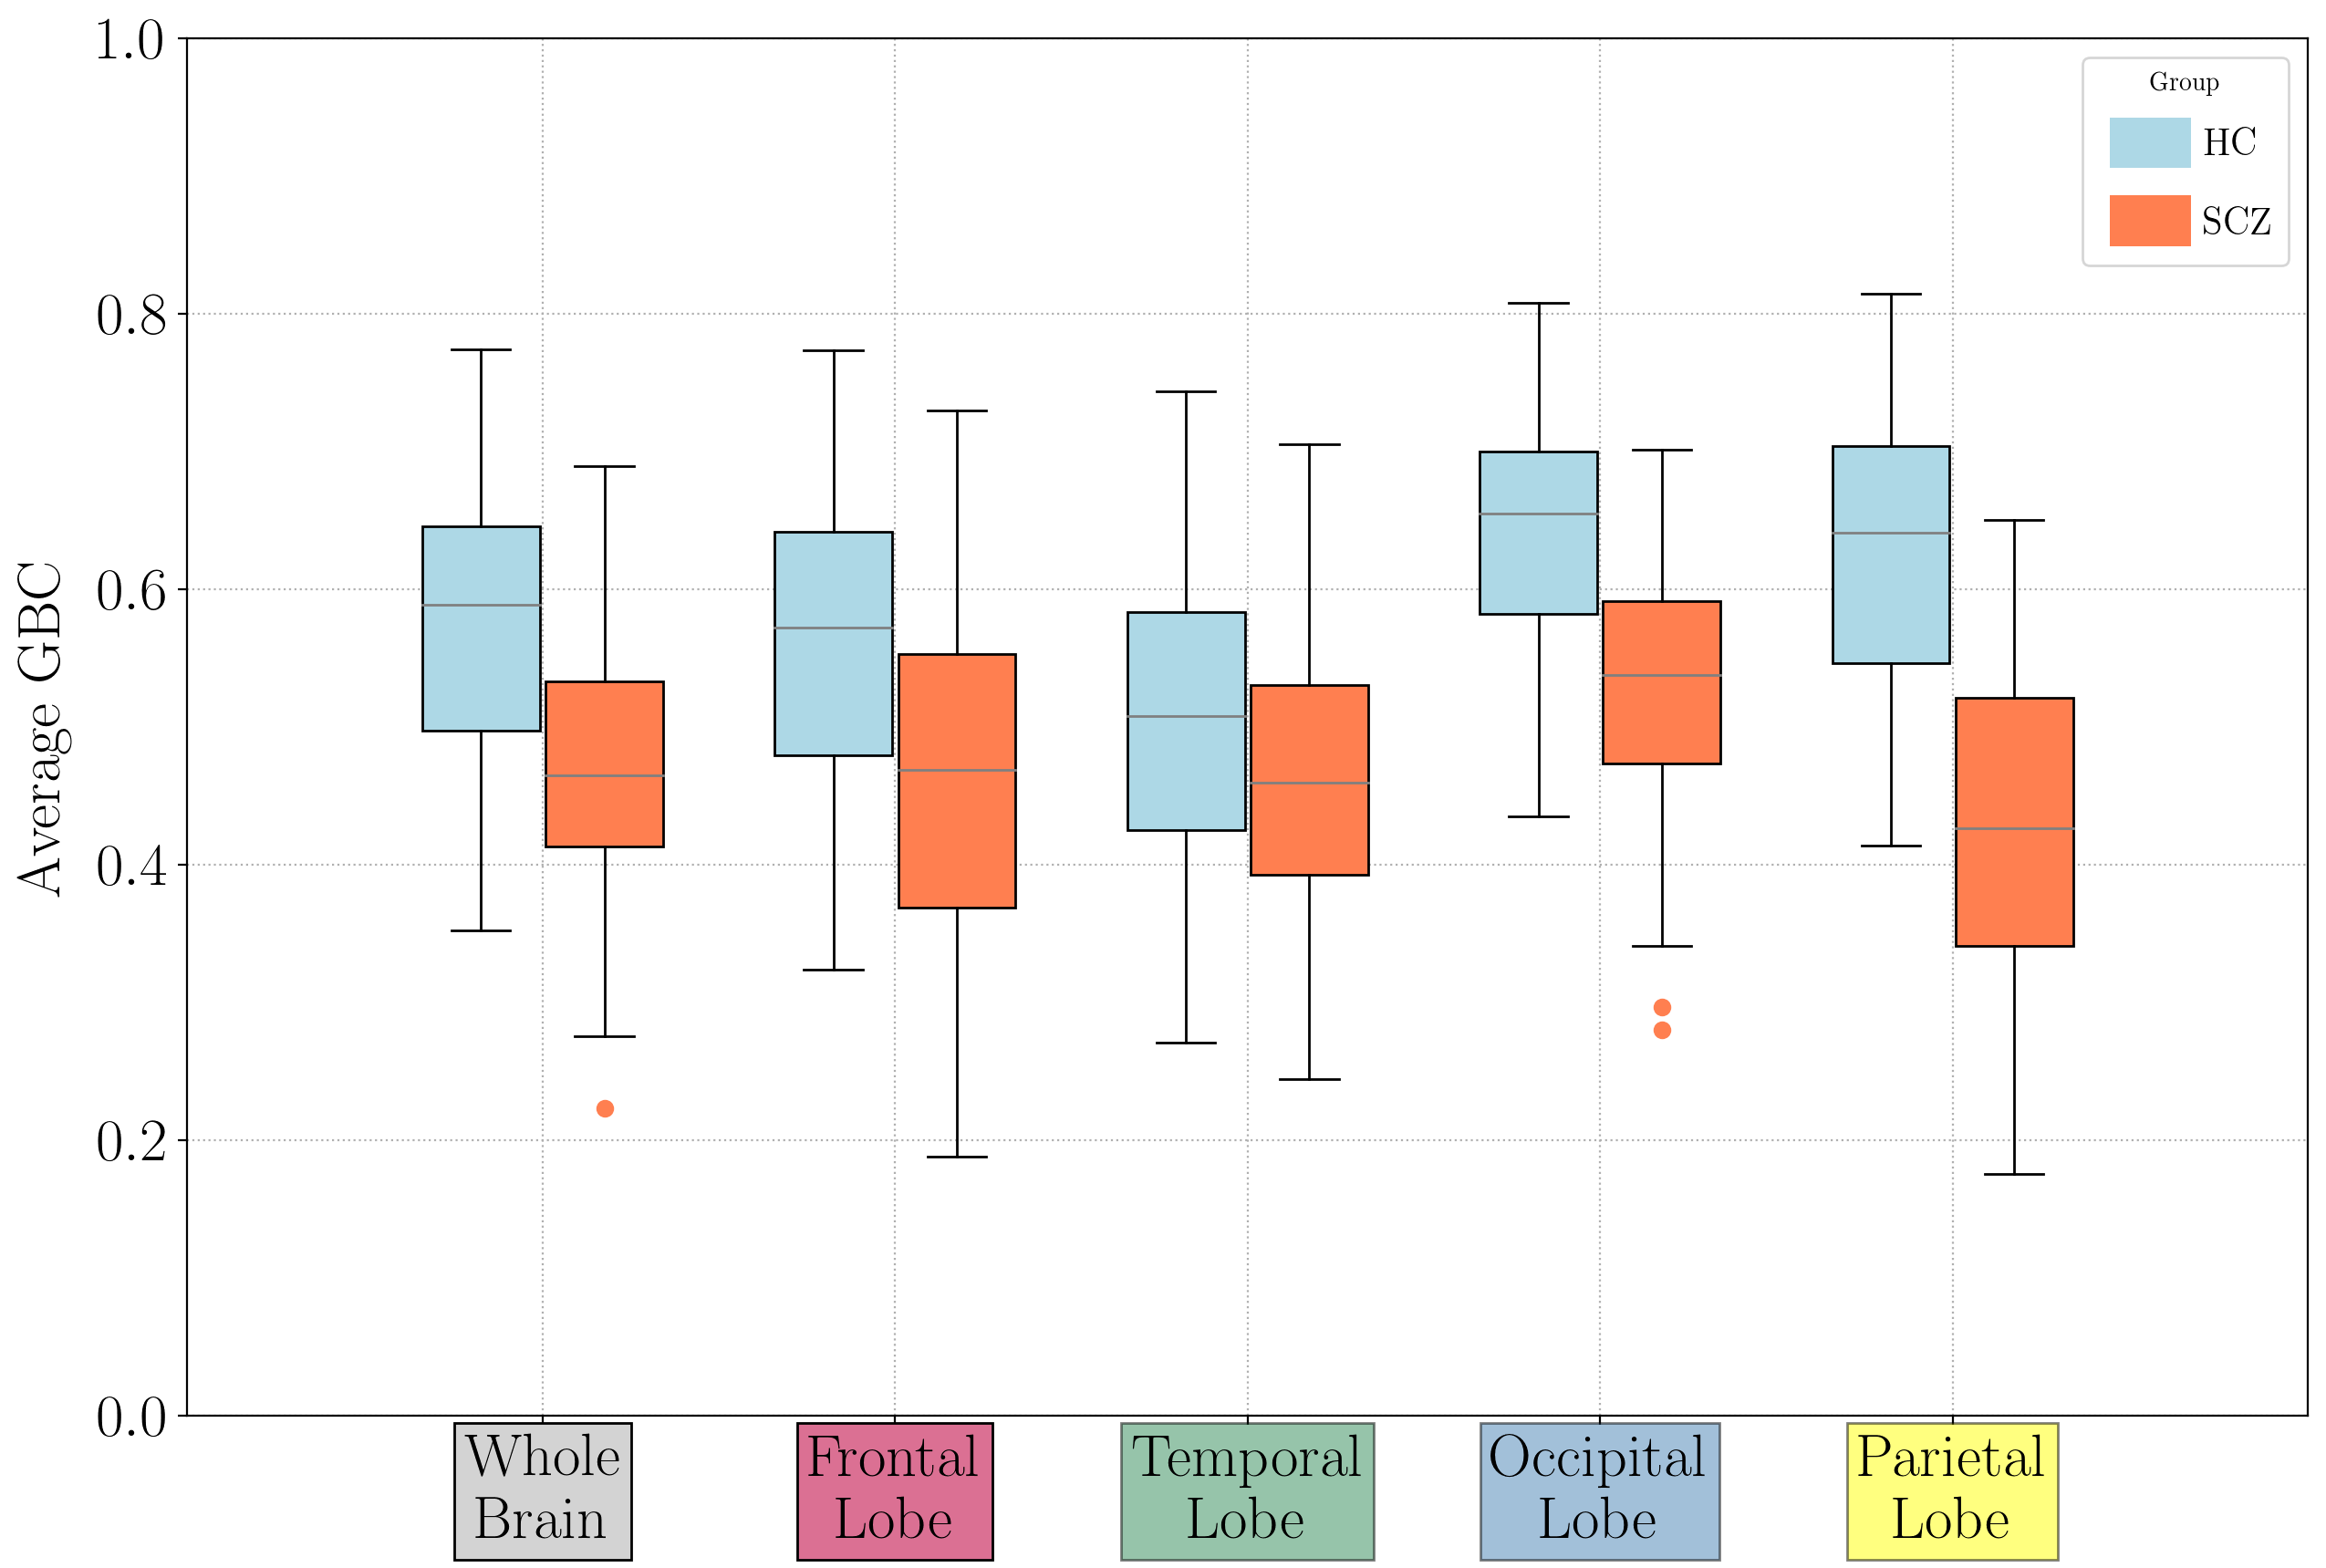

In [4]:
import matplotlib.pyplot as pl
import matplotlib as mpl

from matplotlib.pyplot import figure
fig = figure(figsize=(15, 10), dpi=200)
fig.set_facecolor('w') 

mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#hc = [total, frontal, temporal, occipital, parietal]
#scz = [total_scz, frontal_scz, temporal_scz, occipital_scz, parietal_scz]


colors = ['lightblue', 'coral']
data_groups = [hc, scz]

labels_list = ['Whole\nBrain', 'Frontal\nLobe', 'Temporal\nLobe', 'Occipital\nLobe', 'Parietal\nLobe']
width       = 1/len(labels_list)
xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(hc))]

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])

ax = pl.gca()
ax.set_ylim(ymin-0.1,ymax+0.1)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

#pl.xlabel('Lobe', fontsize=24, loc="center", labelpad = 10)
pl.ylabel('Average GBC', fontsize=24, labelpad = 10)
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2


group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=c,
                labels=['']*len(labels_list),
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),                      
                medianprops=dict(color='grey'),
                #flierprops=dict(linestyle='-', linewidth=1.5),
                #capprops=dict(color=c),
                #whiskerprops=dict(color=c),
                patch_artist=True,
                )
        
mpl.rcParams['legend.handlelength'] = 2
mpl.rcParams['legend.handleheight'] = 2
ax.set_xticks(xlocations)
ax.set_xticklabels(labels_list, rotation=0)
ax.set_ylim([0, 1])
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch



class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10
        p = patches.Rectangle(xy=(x-10, y-5), width=w+22, height=h+10)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)

        return [p]


ax.get_xticklabels()[0].set_bbox(dict(facecolor="lightgrey"))
ax.get_xticklabels()[0].set_weight("bold")
ax.get_xticklabels()[1].set_bbox(dict(facecolor="palevioletred"))
ax.get_xticklabels()[1].set_weight("bold")
ax.get_xticklabels()[2].set_bbox(dict(facecolor="seagreen",alpha=0.5))
ax.get_xticklabels()[2].set_weight("bold")
ax.get_xticklabels()[3].set_bbox(dict(facecolor="steelblue",alpha=0.5))
ax.get_xticklabels()[3].set_weight("bold")
ax.get_xticklabels()[4].set_bbox(dict(facecolor="yellow",alpha=0.5))
ax.get_xticklabels()[4].set_weight("bold")


rect = patches.Rectangle((0,0), 1, 1, facecolor='lightblue')
rect2 = patches.Rectangle((0,0), 1, 1, facecolor='coral')

plt.legend((rect, rect2), ('HC', 'SCZ'),
            handler_map={
               patches.Rectangle: HandlerRect(),
               patches.Rectangle: HandlerRect(),
            }, title = "Group", prop={'size': 15})

plt.rcParams['legend.title_fontsize'] = 24

pl.show()


In [7]:
print(np.mean(hc[0]))
print(np.mean(hc[1]))
print(np.mean(hc[2]))
print(np.mean(hc[3]))
print(np.mean(hc[4]))
print(np.mean(scz[0]))
print(np.mean(scz[1]))
print(np.mean(scz[2]))
print(np.mean(scz[3]))
print(np.mean(scz[4]))

0.5797466291770451
0.5657493256696946
0.5066416183473793
0.639473009667811
0.6297254289305769
0.46942714119906304
0.4610079716473029
0.4594452224247437
0.5287888027480835
0.428584534617649


In [8]:
import numpy as np
print(np.std(hc[0]))
print(np.std(hc[1]))
print(np.std(hc[2]))
print(np.std(hc[3]))
print(np.std(hc[4]))
print(np.std(scz[0]))
print(np.std(scz[1]))
print(np.std(scz[2]))
print(np.std(scz[3]))
print(np.std(scz[4]))

0.09856748195859596
0.10511056306456437
0.10644644981591916
0.0895145667927051
0.09944347036421515
0.10004012358241401
0.1150797167100178
0.10357488787820233
0.09202042145718782
0.10981703077457682


In [9]:
import pingouin as pg

res1 = pg.ttest(hc[0], scz[0], correction=False)
res2 = pg.ttest(hc[1], scz[1], correction=False)
res3 = pg.ttest(hc[2], scz[2], correction=False)
res4 = pg.ttest(hc[3], scz[3], correction=False)
res5 = pg.ttest(hc[4], scz[4], correction=False)

display(res1)
display(res2)
display(res3)
display(res4)
display(res5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.815864,198,two-sided,3.152420e-13,"[0.08, 0.14]",1.10533,1.975e+10,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.68664,198,two-sided,2.276280e-10,"[0.07, 0.14]",0.945634,3.679e+07,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.161822,198,two-sided,0.001814,"[0.02, 0.08]",0.447149,15.34,0.882285


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.578602,198,two-sided,2.772993e-15,"[0.09, 0.14]",1.213198,1.876e+12,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.508675,198,two-sided,6.711305e-30,"[0.17, 0.23]",1.910415,3.281e+26,1.0


In [13]:
def calculate_region_gbc(indices, bold_signal):
    tmp = []
    for i in indices:
        tmp.append(bold_signal[i-1])
    return np.mean(tmp)

In [16]:
print(np.mean(FCs))
print(calculate_region_gbc(frontal_indices, FCs))
print(calculate_region_gbc(parietal_indices, FCs))
print(calculate_region_gbc(temporal_indices, FCs))
print(calculate_region_gbc(occipital_indices, FCs))
print(np.mean(FCs_scz))
print(calculate_region_gbc(frontal_indices, FCs_scz))
print(calculate_region_gbc(parietal_indices, FCs_scz))
print(calculate_region_gbc(temporal_indices, FCs_scz))
print(calculate_region_gbc(occipital_indices, FCs_scz))

0.4226733816011318
0.38857909840995775
0.46861639364901725
0.4252562641995231
0.46693002287066393
0.3276682867117846
0.30751106729805244
0.3713529371543791
0.3112446488203718
0.3571488781424386


In [14]:
total = []
frontal = []
temporal = []
occipital = []
parietal = []

total_s = []
frontal_s = []
temporal_s = []
occipital_s = []
parietal_s = []

fc = []
fc_scz = []
for i in FC_data:
    fc.append(filterSubcortical(i))
    
for i in FC_data_scz:
    fc_scz.append(filterSubcortical(i))


for i in range(len(fc)):
    total.append(np.mean(fc[i]))
    frontal.append(calculate_region_gbc(frontal_indices, fc[i]))
    parietal.append(calculate_region_gbc(parietal_indices, fc[i]))
    temporal.append(calculate_region_gbc(temporal_indices, fc[i]))
    occipital.append(calculate_region_gbc(occipital_indices, fc[i]))
    total_s.append(np.mean(fc_scz[i]))
    frontal_s.append(calculate_region_gbc(frontal_indices, fc_scz[i]))
    parietal_s.append(calculate_region_gbc(parietal_indices, fc_scz[i]))
    temporal_s.append(calculate_region_gbc(temporal_indices, fc_scz[i]))
    occipital_s.append(calculate_region_gbc(occipital_indices, fc_scz[i]))

In [14]:
import numpy as np
print(np.std(total))
print(np.std(frontal))
print(np.std(parietal))
print(np.std(temporal))
print(np.std(occipital))
print(np.std(total_s))
print(np.std(frontal_s))
print(np.std(parietal_s))
print(np.std(temporal_s))
print(np.std(occipital_s))

0.14492626097519337
0.15144347213606907
0.13329705512932583
0.15120583599885903
0.14827054442574922
0.15174650846640597
0.1462248771784575
0.15666926713331825
0.16724487224734494
0.15780117432919752


In [16]:
import pingouin as pg

res1 = pg.ttest(total, total_s, correction=False)
res2 = pg.ttest(frontal, frontal_s, correction=False)
res3 = pg.ttest(parietal, parietal_s, correction=False)
res4 = pg.ttest(temporal, temporal_s, correction=False)
res5 = pg.ttest(occipital, occipital_s, correction=False)
display(res1)
display(res2)
display(res3)
display(res4)
display(res5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.678573,70,two-sided,0.009207,"[0.02, 0.17]",0.631346,4.881,0.752287


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.278239,70,two-sided,0.025768,"[0.01, 0.15]",0.536986,2.169,0.612933


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.797338,70,two-sided,0.006649,"[0.03, 0.17]",0.659339,6.348,0.7878


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.991615,70,two-sided,0.00383,"[0.04, 0.19]",0.705131,9.964,0.839003


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.99946,70,two-sided,0.003744,"[0.04, 0.18]",0.70698,10.152,0.840886
